In [2]:
import numpy as np
import os.path
from data import Instance, DataSet
from miscellaneous import initialize_data, plot_graph, plot_points
from neural_network import NeuralNetwork
from activation_function import ActivationFunction, step_func, sig_func, tanh_func, relu_func
import matplotlib.pyplot as plt

### **Questão 01**

#### Geração do Conjunto de Dados

In [13]:
data_set_1 = initialize_data("data_set_1", 1000, seed = 11403723)

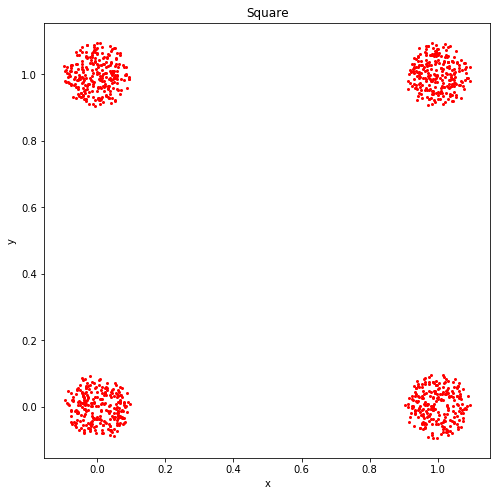

In [15]:
#Plot data
aux_1 = [ inst.input for inst in data_set_1.data() ]
plot_points([aux_1], "Square", "x", "y", figsizex = 8, figsizey = 8)

#### Criação e Treinamento da Rede

In [16]:
net_1 = NeuralNetwork(3, [8], [step_func], seed = 11403723)
data_1 = net_1.fit(data_set_1, "stochastic", 10, learning_rate = 0.1, type = "class", tvt_ratio = [7, 2, 1], 
                            print_info = False)

|| Epoch: 10 || 
|  15   0   0   0   0   0   0   0  |
|   0  13   0   0   0   0   0   0  |
|   0   0  11   0   0   0   0   0  |
|   0   0   0  15   0   0   0   0  |
|   0   0   0   0  12   0   0   0  |
|   0   0   0   0   0  16   0   0  |
|   0   0   0   0   0   0   9   0  |
|   0   0   0   0   0   0   0   9  |

Correct: 100.0%
Incorrect: 0.0%


#### Resultados

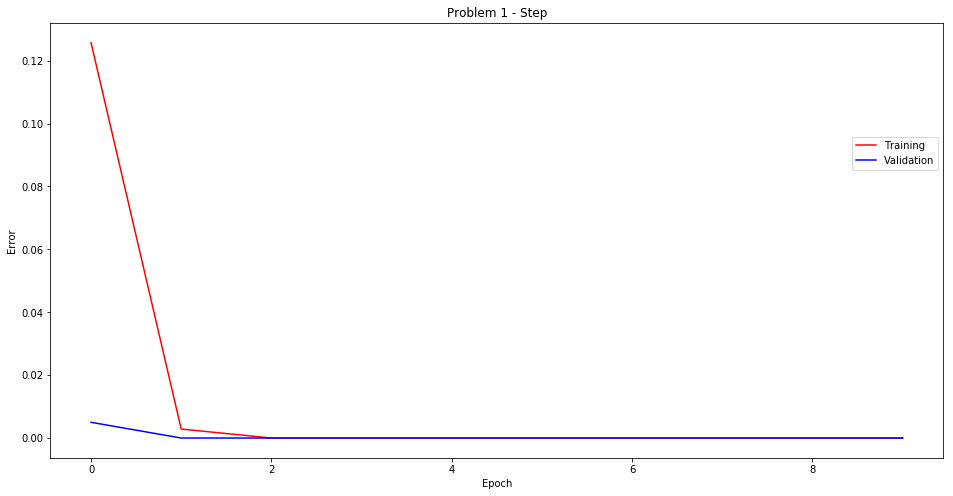

In [17]:
plot_graph(data_1, "Problem 1 - Step", "Epoch", "Error", figsizex = 16, figsizey = 8)

### **Questão 01 - Solução alternativa**

#### Criação e Treinamento da Rede

In [18]:
net_1b = NeuralNetwork(3, [3, 8], 2*[sig_func], 11403723)
data_1b = net_1b.fit(data_set_1, "stochastic", 50, learning_rate = 0.1, type = "class", tvt_ratio = [7, 2, 1], 
                              print_info = False)

|| Epoch: 50 || 
|  15   0   0   0   0   0   0   0  |
|   0  13   0   0   0   0   0   0  |
|   0   0  11   0   0   0   0   0  |
|   0   0   0  15   0   0   0   0  |
|   0   0   0   0  12   0   0   0  |
|   0   0   0   0   0  16   0   0  |
|   0   0   0   0   0   0   9   0  |
|   0   0   0   0   0   0   0   9  |

Correct: 100.0%
Incorrect: 0.0%


#### Resultados

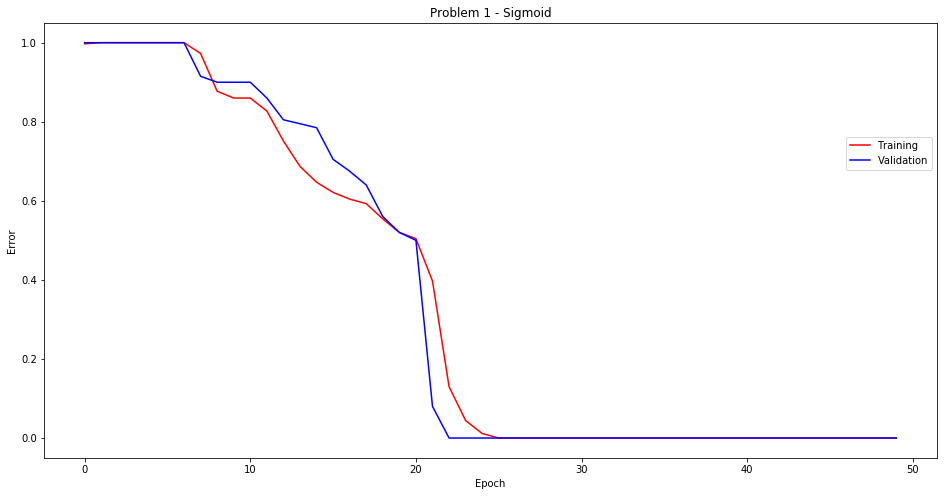

In [19]:
plot_graph(data_1b, "Problem 1 - Sigmoid", "Epoch", "Error", figsizex = 16, figsizey = 8)

### **Questão 03 - a**

#### Geração do Conjunto de Dados

In [20]:
data_set_3a = initialize_data("data_set_3a", 100, seed = 11403723)

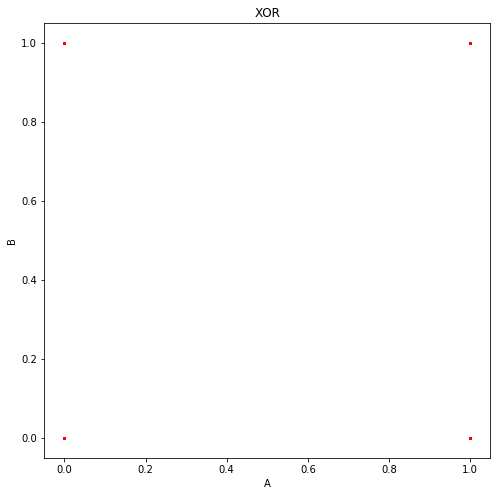

In [21]:
#Plot data
aux_3a = [ inst.input for inst in data_set_3a.data() ]
plot_points([aux_3a], "XOR", "A", "B", figsizex = 8, figsizey = 8)

#### Criação e Treinamento Estocástico da Rede

In [22]:
# Stochastic
net_3a1 = NeuralNetwork(2, [2, 4, 1], 3*[sig_func], seed = 11403723)
data_3a1 = net_3a1.fit(data_set_3a, "stochastic", 800, learning_rate = 0.2, type = "reg", tvt_ratio = [7, 2, 1], 
                                print_info = False)

|| Epoch: 800 || 

#### Resultados

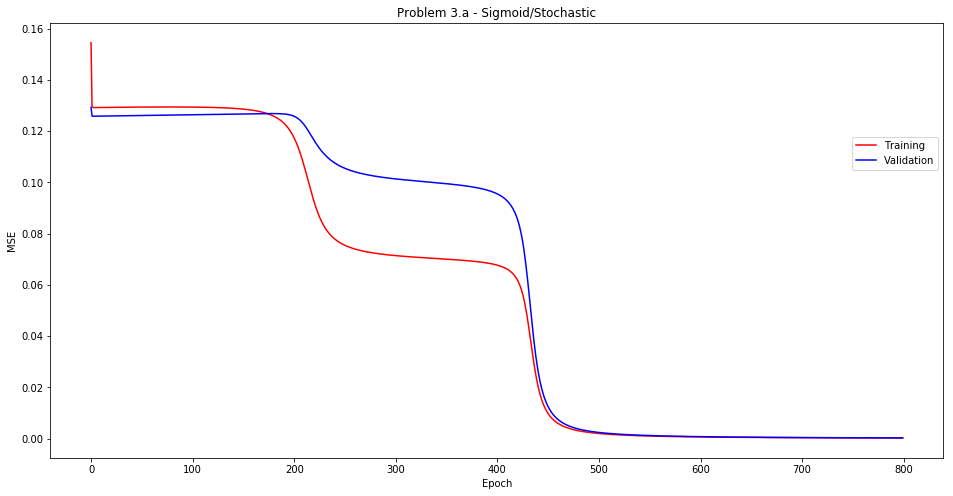

In [24]:
plot_graph(data_3a1, "Problem 3.a - Sigmoid/Stochastic", "Epoch", "MSE", figsizex = 16, figsizey = 8)

#### Criação e Treinamento em Lote da Rede

In [32]:
# Batch
net_3a2 = NeuralNetwork(2, [2, 4, 1], 3*[sig_func], seed = 11403723) #4 6 1
data_3a2 = net_3a2.fit(data_set_3a, "batch", 500, learning_rate = 0.2, type = "reg", tvt_ratio = [7, 2, 1],
                       print_info = False)

|| Epoch: 500 || 

#### Resultados

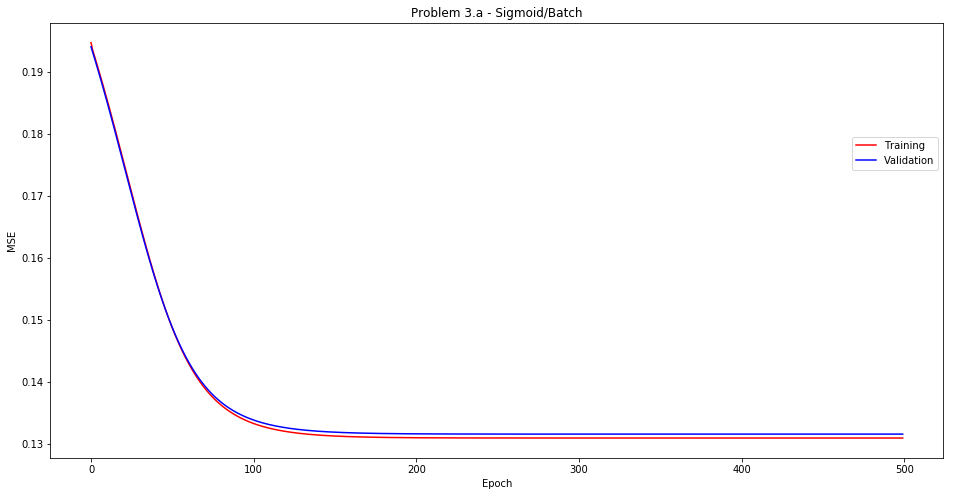

In [35]:
plot_graph(data_3a2, "Problem 3.a - Sigmoid/Batch", "Epoch", "MSE", figsizex = 16, figsizey = 8)

#### Criação e Treinamento Estocástico da Rede usando termo do Momento

In [25]:
# Stochastic + Momentum
net_3a3 = NeuralNetwork(2, [2, 4, 1], 3*[sig_func], seed = 11403723)
data_3a3 = net_3a3.fit(data_set_3a, "stochastic", 500, learning_rate = 0.2, type = "reg", tvt_ratio = [7, 2, 1],
                        momentum = 0.5, print_info = False)

|| Epoch: 500 || 

#### Resultados

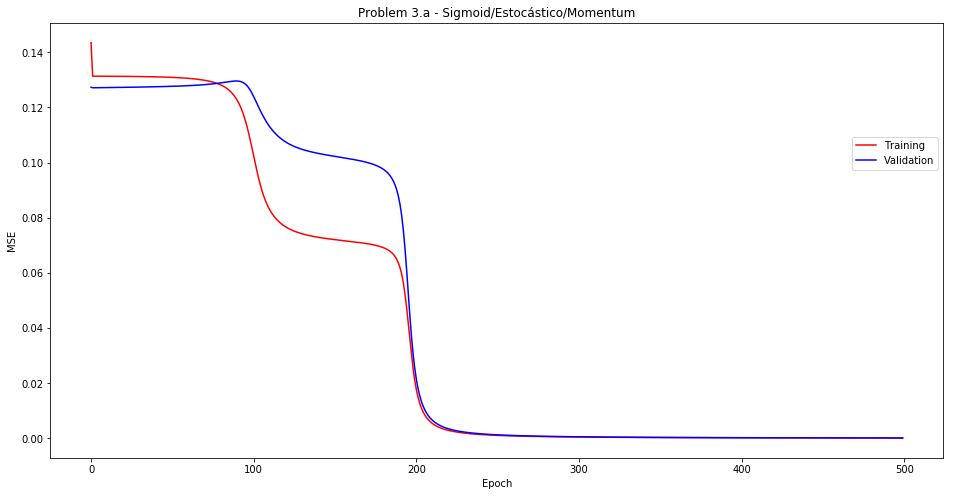

In [27]:
plot_graph(data_3a3, "Problem 3.a - Sigmoid/Estocástico/Momentum", "Epoch", "MSE", figsizex = 16, figsizey = 8)

In [16]:
for x in range(2):
    for y in range(2):
        print("[", x, ",", y, "] : ", net_3a3.classify([x, y])[0])

[ 0 , 0 ] :  0.9810112783021259
[ 0 , 1 ] :  0.020344895430957674
[ 1 , 0 ] :  0.014359927574710489
[ 1 , 1 ] :  0.9856833994682187


### **Questão 03 - b**

#### Geração do Conjunto de Dados

In [28]:
data_set_3b = initialize_data("data_set_3b", 5000) #5000 é ótimo

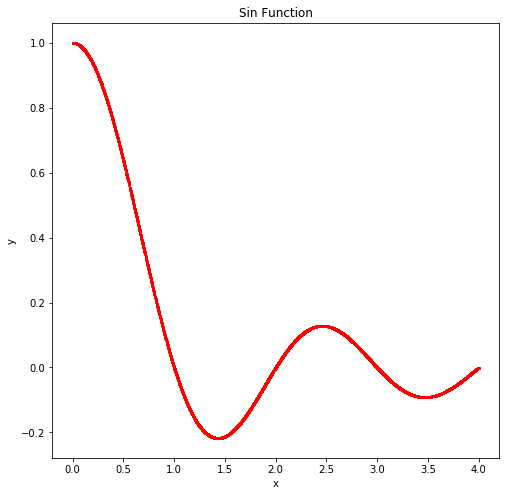

In [29]:
#Plot data
aux_3b = [[inst.input, inst.expected_output] for inst in data_set_3b.data()]
plot_points([aux_3b], "Sin Function", "x", "y", figsizex = 8, figsizey = 8)

#### Criação e Treinamento Estocástico da Rede

In [30]:
# Stochastic
net_3b1 = NeuralNetwork(1, [5, 3, 1], 3*[tanh_func], seed = 11403723)
data_3b1 = net_3b1.fit(data_set_3b, "stochastic", 500, learning_rate = 0.1, type = "reg", tvt_ratio = [7, 2, 1], 
                        print_info = False)

|| Epoch: 500 || 

#### Resultados

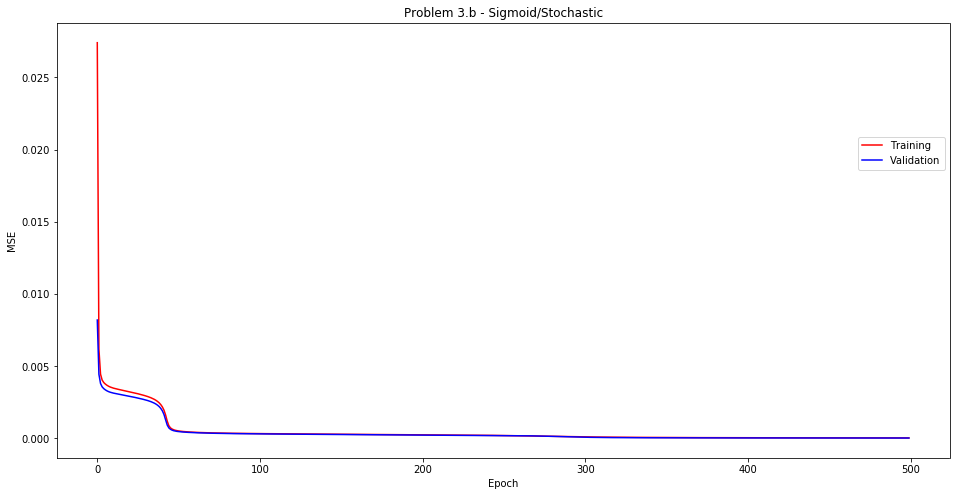

In [36]:
plot_graph(data_3b1, "Problem 3.b - Sigmoid/Stochastic", "Epoch", "MSE", figsizex = 16, figsizey = 8)

#### Criação e Treinamento em Lote da Rede

In [33]:
# Batch
net_3b2 = NeuralNetwork(1, [5, 3, 1], 3*[tanh_func])
data_3b2 = net_3b2.fit(data_set_3b, "batch", 200, learning_rate = 0.10, type = "reg", tvt_ratio = [7, 2, 1], 
                        print_info = False) #1000

|| Epoch: 200 || 

#### Resultados

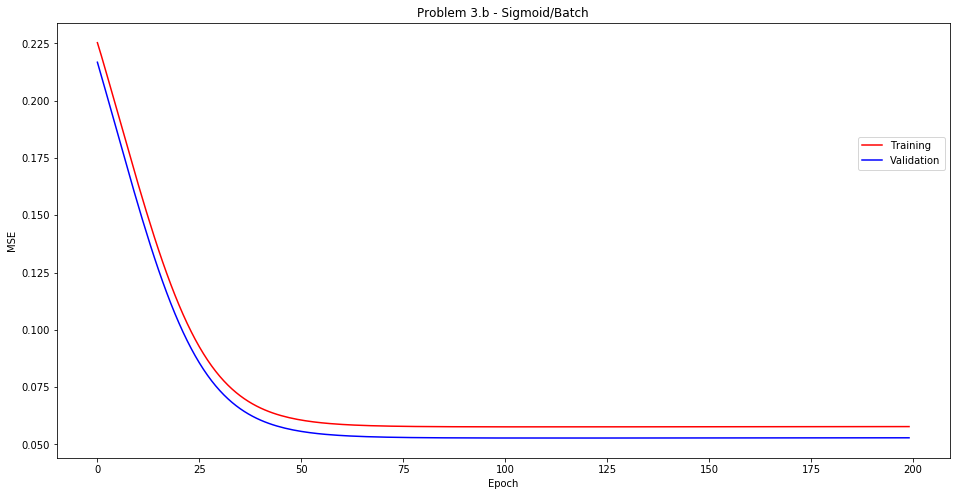

In [37]:
plot_graph(data_3b2, "Problem 3.b - Sigmoid/Batch", "Epoch", "MSE", figsizex = 16, figsizey = 8)

#### Criação e Treinamento Estocástico da Rede usando termo do Momento

In [31]:
# Stochastic + Momentum
net_3b3 = NeuralNetwork(1, [5, 3, 1], 3*[tanh_func], seed = 11403723)
data_3b3 = net_3b3.fit(data_set_3b, "stochastic", 200, learning_rate = 0.1, type = "reg", tvt_ratio = [7, 2, 1], 
                        momentum = 0.5, print_info = False) # 500 épocas

|| Epoch: 200 || 

#### Resultados

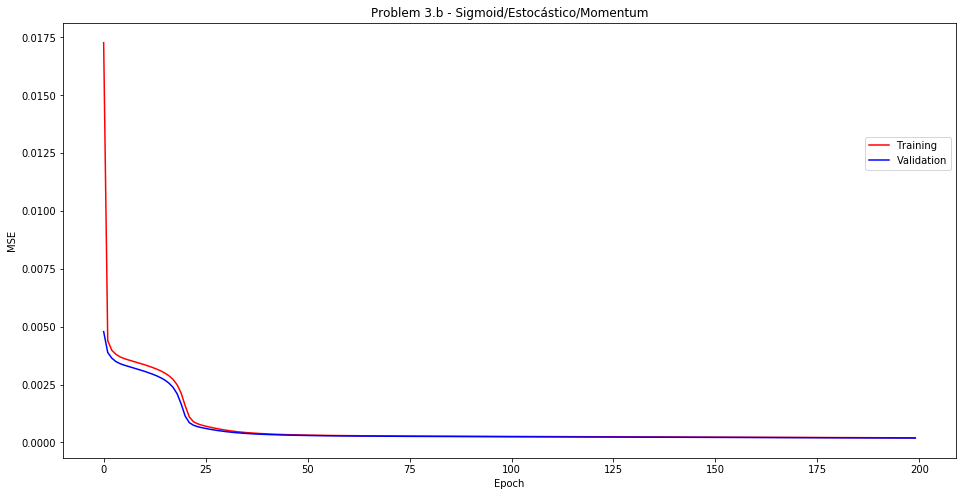

In [38]:
plot_graph(data_3b3, "Problem 3.b - Sigmoid/Estocástico/Momentum", "Epoch", "MSE", figsizex = 16, figsizey = 8)

#### Comparação entre a Rede Neural e a Função

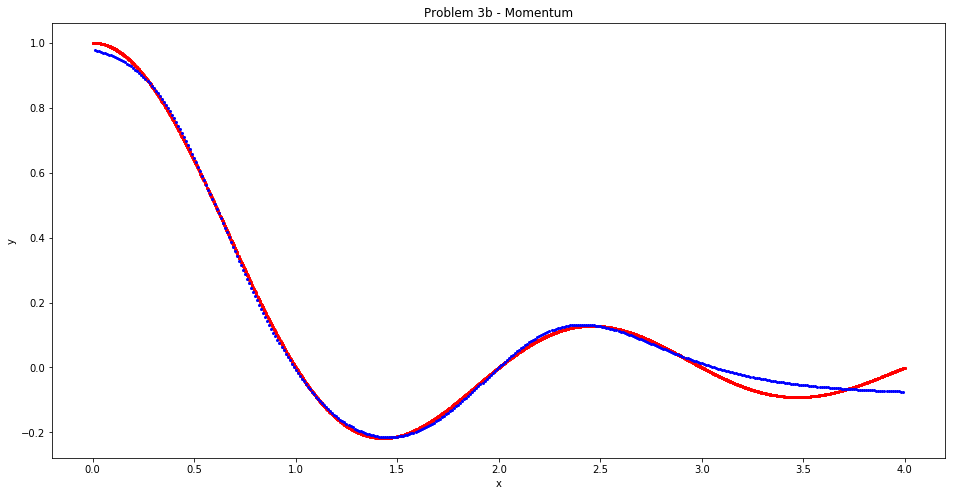

In [55]:
#Grafico
aux_ex = []
for instance in range(1, 400):
    net_3b3.classify([instance/100])
    aux_ex.append([instance/100, net_3b3.output[0]])

plot_points([aux_3b, aux_ex], "Problem 3b", "x", "y", figsizex = 16, figsizey = 8)

### **Questão 04**

#### Geração do Conjunto de Dados

In [3]:
data_set_4 = initialize_data("data_set_4", 2000, seed = 11403723) # 2000

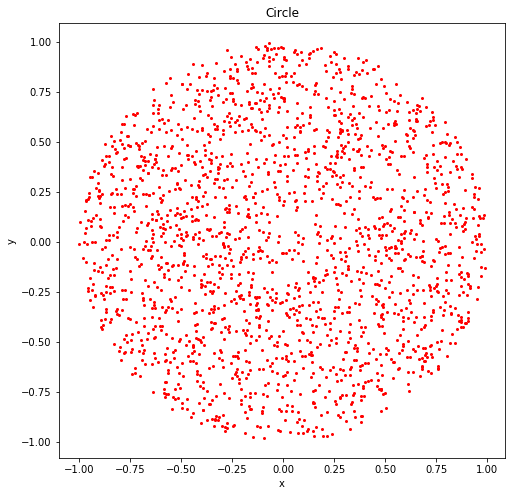

In [41]:
#Plot data
aux_4 = [inst.input for inst in data_set_4.data()]
plot_points( [aux_4], "Circle", "x", "y", figsizex = 8, figsizey = 8)

#### Criação e Treinamento da Rede

In [5]:
net_4 = NeuralNetwork(2, [4, 6, 8, 8], 4*[sig_func], seed = 11403723)
data_4 = net_4.fit(data_set_4, "stochastic", 2000, learning_rate = 0.02, type = "class", tvt_ratio = [7, 2, 1],
                        print_info = False, momentum = 0.8)

|| Epoch: 2000 || 
|  31   0   0   0   0   0   0   0  |
|   0  29   0   0   0   0   0   0  |
|   0   0  29   0   0   0   1   0  |
|   1   0   1  25   0   0   0   2  |
|   1   0   0   0  19   0   0   0  |
|   0   0   0   0   0  26   0   0  |
|   0   0   3   0   0   0  17   0  |
|   0   0   0   5   0   0   0  10  |

Correct: 93.0%
Incorrect: 7.0%


#### Resultados

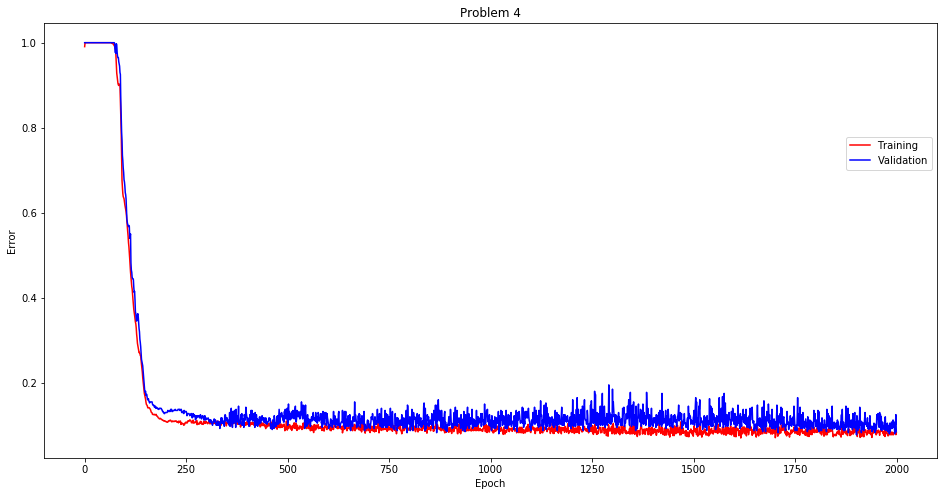

In [12]:
plot_graph(data_4, "Problem 4", "Epoch", "Error", figsizex = 16, figsizey = 8)

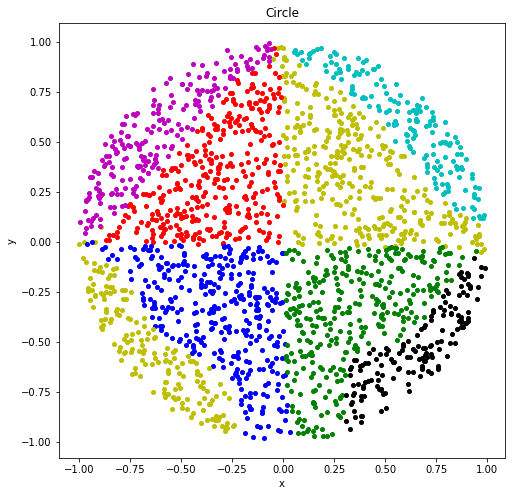

In [52]:
points = [[], [], [], [], [], [], [], []]
for i in data_set_4.data():
    result = net_4.classify(i.input)
    temp = [ 0.0 if k < 0.5 else 1.0 for k in result]
    if 1.0 not in temp:
        temp[0] = 1.0
    points[ temp.index(1.0)].append(i.input)
plot_points( points, "Circle", "x", "y", figsizex = 8, figsizey = 8, point_size = 4, colors = ['y'])

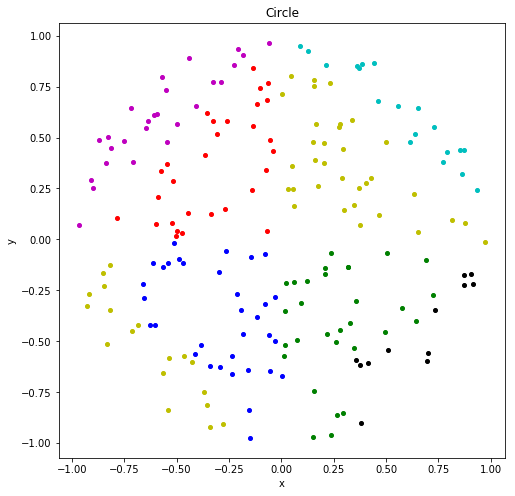

In [54]:
points = [[], [], [], [], [], [], [], []]
for i in data_set_4.data()[1800:2000]:
    result = net_4.classify(i.input)
    temp = [ 0.0 if k < 0.5 else 1.0 for k in result]
    if 1.0 not in temp:
        temp[0] = 1.0
    points[ temp.index(1.0)].append(i.input)
plot_points( points, "Circle", "x", "y", figsizex = 8, figsizey = 8, point_size = 4, colors = ['y'])

### **Questão 05**

#### Geração do Conjunto de Dados

In [7]:
data_set_5 = initialize_data("data_set_5", 1000, seed = 11403723)

#### Criação e Treinamento da Rede

In [8]:
net_5 = NeuralNetwork(10, [4, 3], 3*[tanh_func], seed = 11403723)
data_5 = net_5.fit(data_set_5, "stochastic", 1000, learning_rate = 0.05, type = "reg", tvt_ratio = [7, 2, 1],
                       momentum = 0.5, print_info = False)

|| Epoch: 1000 || 

#### Resultados

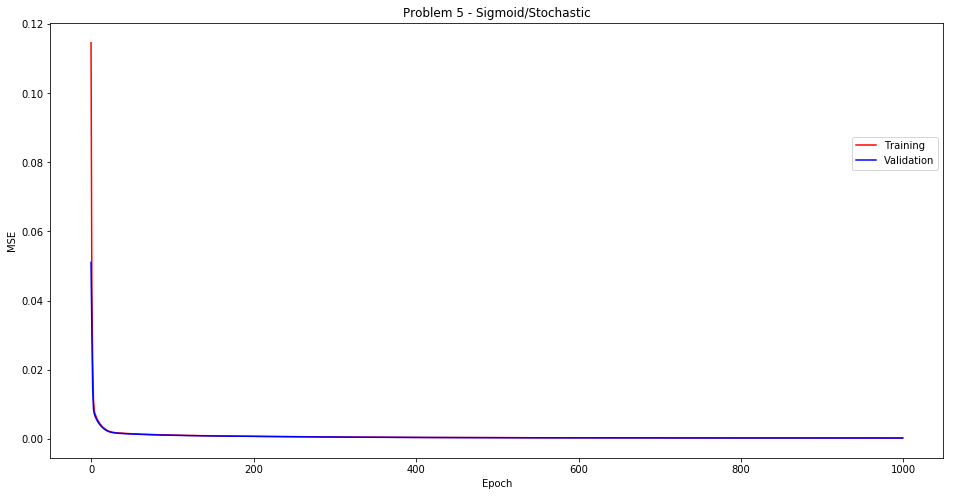

In [44]:
plot_graph(data_5, "Problem 5 - Sigmoid/Stochastic", "Epoch", "MSE", figsizex = 16, figsizey = 8)

#### Comparação entre a Rede Neural e a Sequência Real

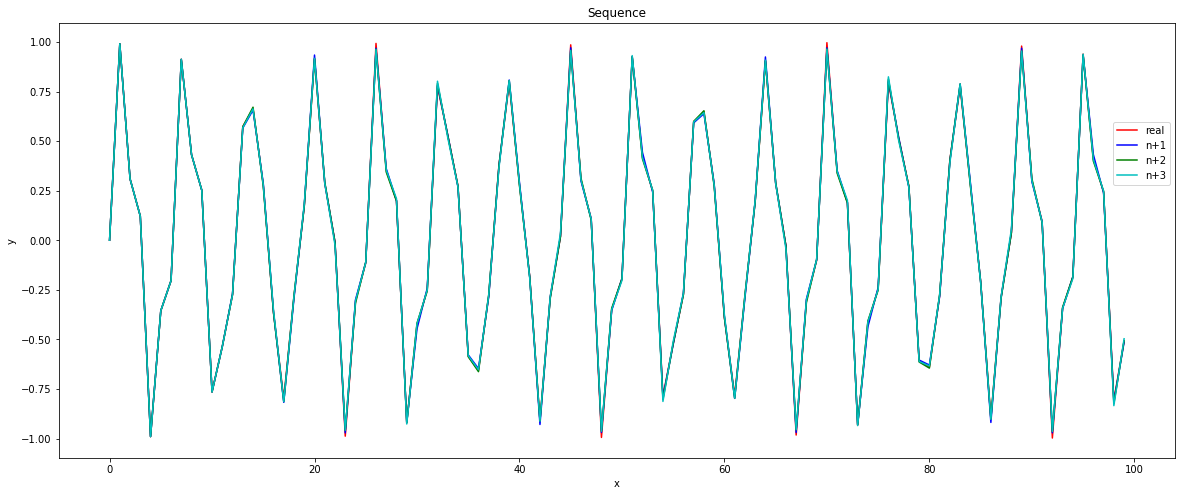

In [10]:
#Grafico
data_t = [[], [], [], [], []]
x_size = 100
for n in range(x_size):
    sin_n = np.sin(n)
    data_t[0].append( n )
    data_t[1].append( np.sin(n + sin_n*sin_n) )

data_t[2] = data_t[1][0:11]
for n in range(10, x_size-1):   
    net_5.classify([data_t[1][x] for x in range(n-10, n)])
    data_t[2].append(net_5.output[0])

data_t[3] = data_t[1][0:12]
for n in range(10, x_size-2):   
    net_5.classify([data_t[1][x] for x in range(n-10, n)])
    data_t[3].append(net_5.output[1])
    
data_t[4] = data_t[1][0:13]
for n in range(10, x_size-3):   
    net_5.classify([data_t[1][x] for x in range(n-10, n)])
    data_t[4].append(net_5.output[2])

plot_graph(data_t, "Sequence", "x", "y", labels = ["real", "n+1", "n+2", "n+3"], figsizex = 20)